In [ ]:
#Aty Sokoy
# This is a business data for Online Retail from the UCI Machine Learning Repository
#This is a transactional data set which containing all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
#Key features: InvoiceNo, StockCode, Description, Quantity, InvoiceData, UnitPrice, CustomerID, and Country

In [40]:
# Ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
# Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Import seaborn
import seaborn as sns

In [41]:
file = pd.read_csv("OnlineRetail.csv")
 
# printing the top 10 rows
display(file.head(10))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [42]:
#List country where each customer from
countries = file['Country'].unique()
print("There are:", len(countries), "countries where the buyer comes from.")
print("These countries are: ")
for country in countries:
   print(country)


There are: 38 countries where the buyer comes from.
These countries are: 
United Kingdom
France
Australia
Netherlands
Germany
Norway
EIRE
Switzerland
Spain
Poland
Portugal
Italy
Belgium
Lithuania
Japan
Iceland
Channel Islands
Denmark
Cyprus
Sweden
Austria
Israel
Finland
Bahrain
Greece
Hong Kong
Singapore
Lebanon
United Arab Emirates
Saudi Arabia
Czech Republic
Canada
Unspecified
Brazil
USA
European Community
Malta
RSA


In [43]:
# On average how many product buy from each countrie (from quantities), which countries is the higher buyer and what is the item
avg=file.groupby(['Country'])['Quantity'].mean().reset_index()
highest_avg_val= avg.max()
print('The average quantities by country are: ', avg)

The average quantities by country are:                   Country   Quantity
0              Australia  66.444003
1                Austria  12.037406
2                Bahrain  13.684211
3                Belgium  11.189947
4                 Brazil  11.125000
5                 Canada  18.298013
6        Channel Islands  12.505277
7                 Cyprus  10.155949
8         Czech Republic  19.733333
9                Denmark  21.048843
10                  EIRE  17.403245
11    European Community   8.147541
12               Finland  15.346763
13                France  12.911067
14               Germany  12.369458
15                Greece  10.657534
16             Hong Kong  16.559028
17               Iceland  13.505495
18                Israel  14.656566
19                 Italy   9.961395
20                 Japan  70.441341
21               Lebanon   8.577778
22             Lithuania  18.628571
23                 Malta   7.433071
24           Netherlands  84.406580
25                Norway

In [44]:
#the name of the product where each customer from
Products = file['Description'].unique()
print("\n There are:", len(Products), " products buy during this period.")


 There are: 4224  products buy during this period.


In [45]:
#Bar graph which shows the distribution of sales across different countries to identify which countries contribute most to the retailer's revenue
#This graph shows that UK dominates sales as it's a UK-based retailer, 

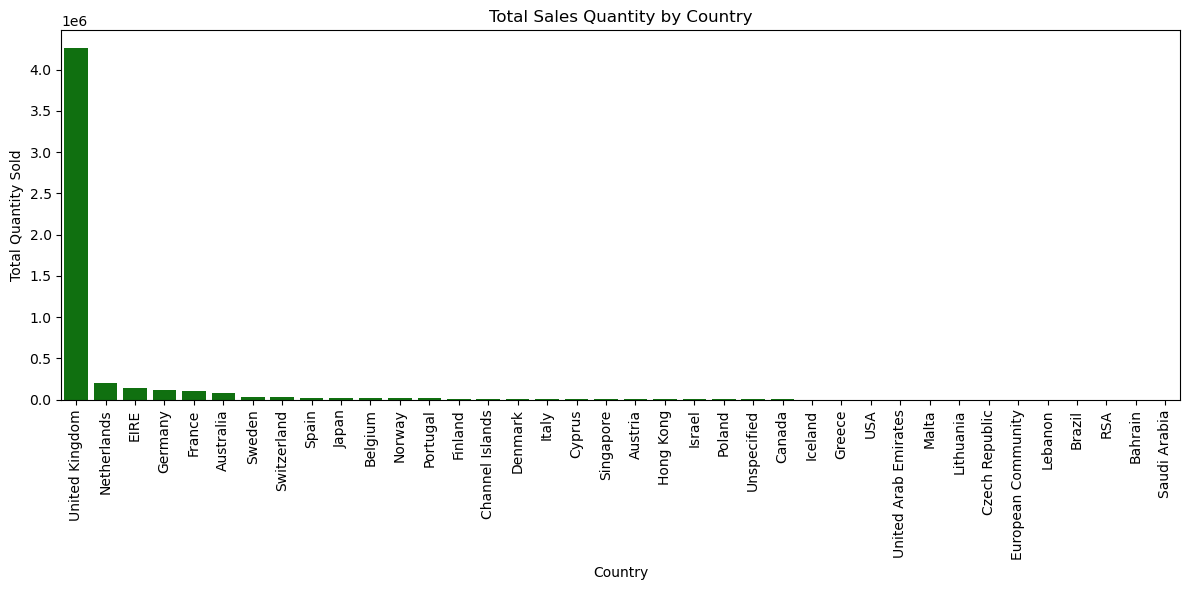

In [60]:
country_sales = file.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.index, y=country_sales.values, color='green')
plt.title('Total Sales Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Aty_SalesByCountry.png')
plt.show()

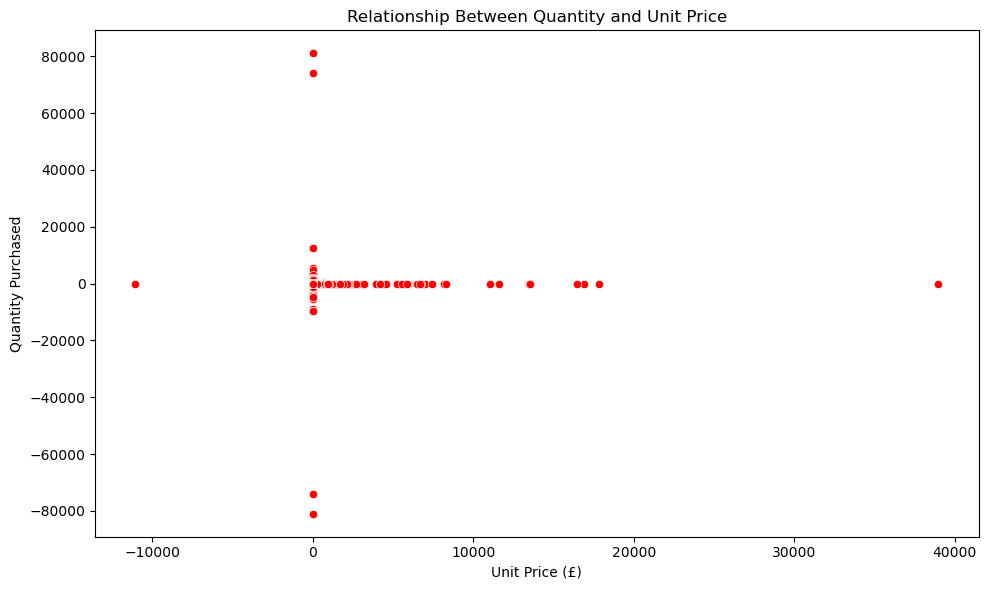

In [47]:
#This scatter plot visualizes the relationship between product unit price and quantity purchased 

plt.figure(figsize=(10,6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=file, color='red')
plt.title('Relationship Between Quantity and Unit Price')
plt.xlabel('Unit Price (£)')
plt.ylabel('Quantity Purchased')
plt.tight_layout()
plt.savefig('2Aty_QuantityPriceRelationship.png')
plt.show()

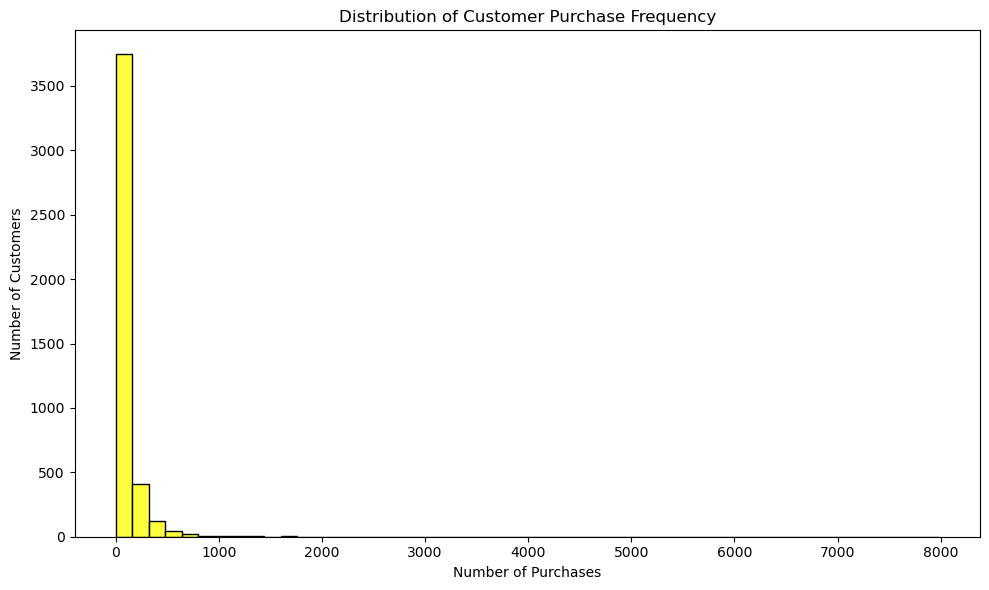

In [59]:
#3shows how frequently customers make purchases to understand customer behavior

# Count transactions per customer
customer_freq = file['CustomerID'].value_counts()
# Create visualization
plt.figure(figsize=(10,6))
sns.histplot(customer_freq, bins=50, color='yellow')
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('3aty_CustomerPurchaseFrequency.png')
plt.show()

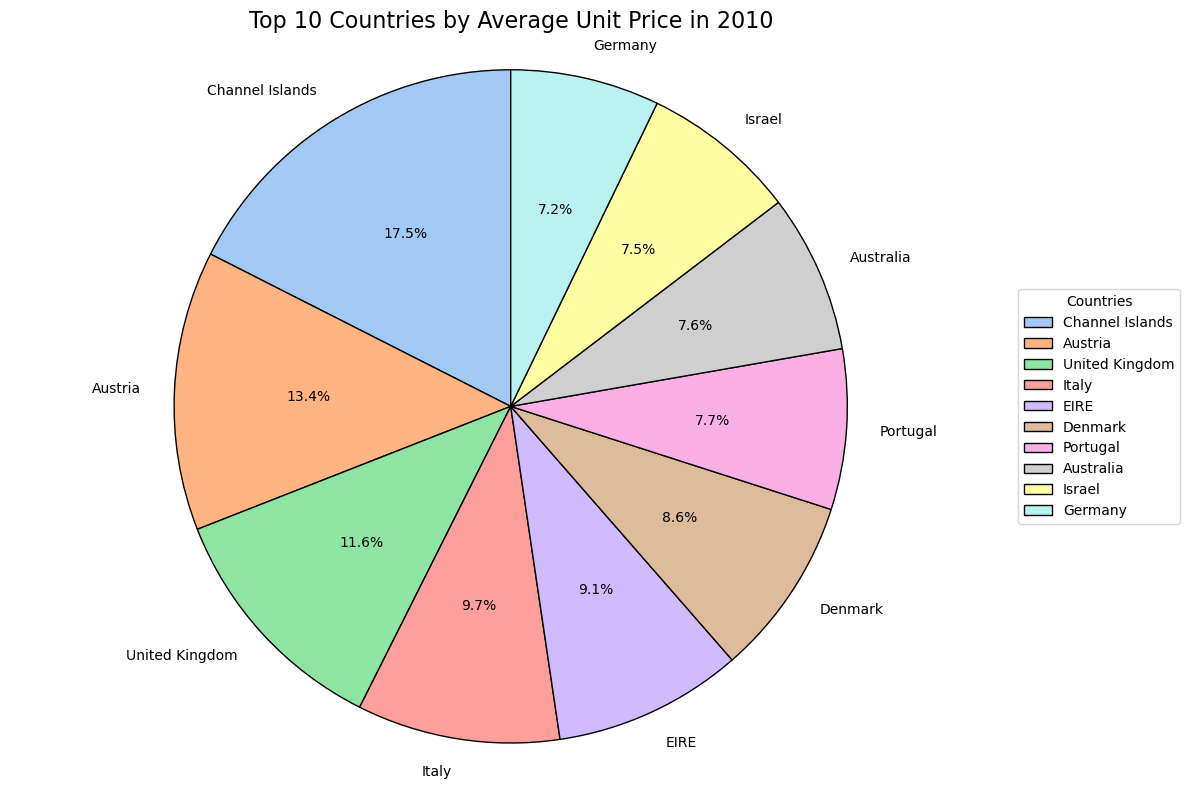

In [57]:
#4.piechart visualizes the average unit price of products sold across different countries in 2010,
#focusing on the top 10 countries with the highest average prices. 

# Get top 10 countries by average price
file['InvoiceDate'] = pd.to_datetime(file['InvoiceDate'])
file_2010 = file[file['InvoiceDate'].dt.year == 2010]

# Calculate average unit price by country and get top 10
avg_price_by_country = file_2010.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)
top_countries = avg_price_by_country.head(10).reset_index()

# Create pie chart using
colors = sns.color_palette('pastel')
plt.figure(figsize=(12, 8))
plt.pie(top_countries['UnitPrice'], 
        labels=top_countries['Country'],
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

# Add title with Seaborn style
plt.title('Top 10 Countries by Average Unit Price in 2010', fontsize=16)

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')

# Add legend
plt.legend(top_countries['Country'],
           title='Countries',
           loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('4ATY_Top10UnitPriceByCountry2010.png')
plt.show()

In [50]:
#5. line plot will show sales trends over time to identify seasonal patterns or growth trends
#The line describe monthly fluctuations or seasonal patterns.

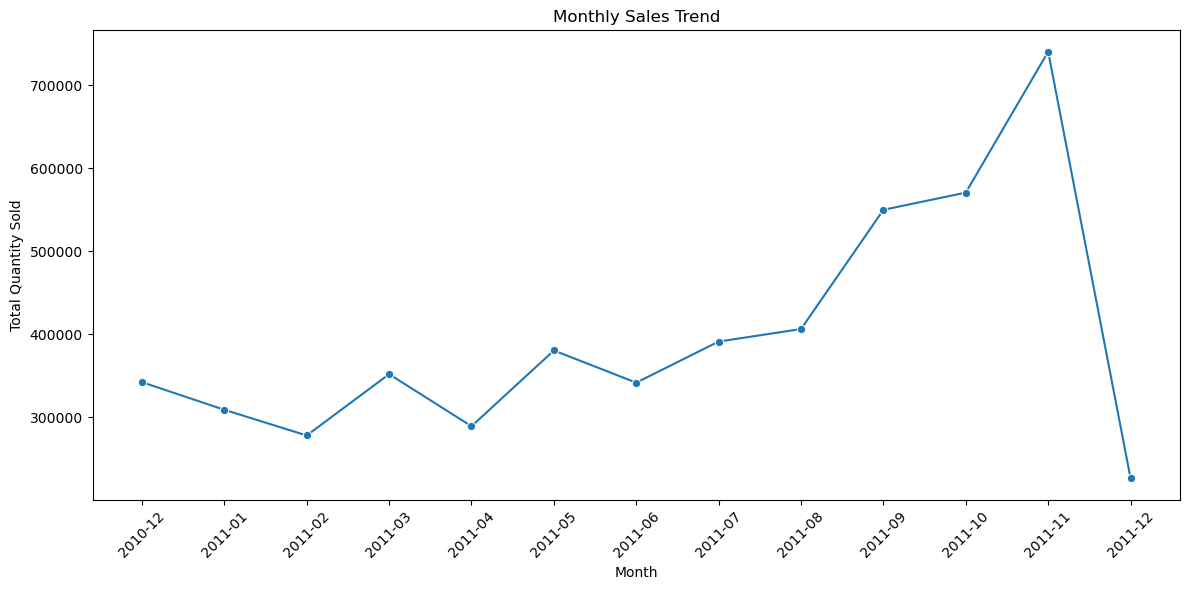

In [51]:
# First convert InvoiceDate to datetime format
file['InvoiceDate'] = pd.to_datetime(file['InvoiceDate'])

# Now extract month and year
file['YearMonth'] = file['InvoiceDate'].dt.to_period('M')

# Aggregate sales by month
monthly_sales = file.groupby('YearMonth')['Quantity'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Create visualization
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='Quantity', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('5ATY_MonthlySalesTrend.png')
plt.show()